# CapitalBikeShare dataset: analysis and manipulation

Important note: 
- old datasets up to 03/2020 have the bike_id associated to each trip but no coordinates of the start/end station
- new ones have stations coordinates but no bike identifier associated to each trip

We are interested in creating a list of trips for each bike to reduce the number of nodes we simulate in ns-3, thus we join the coodinate data to trips in old datasets and use these last ones.

In [1]:
# import packages
import zipfile
import pandas as pd
import numpy as np

# set the directories we are using to store datasets
tripdatadir = 'tripdata/'
gpxdatadir = 'gpxdata/'
ns3datadir = 'ns3data/'

# function to extract one or more .csv/.zip datasets to pandas dataframe


def extract_to_df(months):
    assert months == ['202004'] or all([int(m) < 202004 for m in months])
    df = pd.DataFrame()
    for m in months:
        filename = m + '-capitalbikeshare-tripdata'
        try:
            with zipfile.ZipFile(tripdatadir + filename + '.zip', 'r') as zip_ref:
                zip_ref.extract(filename + '.csv', path=tripdatadir)
        except OSError:
            print('Zip file ' + filename + '.zip not found.')
        df = pd.concat([df, pd.read_csv(tripdatadir + filename + '.csv')])
    return df


## Loading datasets

### Bike trips dataset(s) up to 03/2020

Load datasets up to 03/2020 as they still contain the bike id associated to each trip

(here we can concatenate more than one)

In [2]:
months = ['201904']
trips_dataset = extract_to_df(months)
trips_dataset


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member
3,568,2019-04-01 00:10:20,2019-04-01 00:19:49,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member
4,1609,2019-04-01 00:10:38,2019-04-01 00:37:28,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member
...,...,...,...,...,...,...,...,...,...
347987,1217,2019-04-30 23:54:03,2019-05-01 00:14:20,31634,3rd & Tingey St SE,31601,19th & East Capitol St SE,W23326,Casual
347988,1662,2019-04-30 23:55:16,2019-05-01 00:22:59,31600,5th & K St NW,31703,Minnesota Ave Metro/DOES,W24114,Member
347989,1262,2019-04-30 23:55:56,2019-05-01 00:16:58,31234,20th & O St NW / Dupont South,31400,Georgia & New Hampshire Ave NW,W23071,Member
347990,453,2019-04-30 23:57:15,2019-05-01 00:04:48,31245,7th & R St NW / Shaw Library,31229,New Hampshire Ave & T St NW,W23786,Member


### Dataset with stations coordinates (04/2020)
Used to extract the coordinates of stations (missing in the older datasets)

In [3]:
coords_dataset = extract_to_df(['202004'])
coords_dataset


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,77A0F1B26D1597B1,docked_bike,2020-04-25 17:28:39,2020-04-25 17:35:04,Rhode Island & Connecticut Ave NW,31239,12th & L St NW,31251.0,38.905996,-77.039802,38.903819,-77.028400,casual
1,8698F10128EA4F18,docked_bike,2020-04-06 07:54:59,2020-04-06 07:57:24,21st & I St NW,31205,18th & L St NW,31224.0,38.900711,-77.046449,38.903741,-77.042452,member
2,AA07819DC0F58872,docked_bike,2020-04-22 17:06:18,2020-04-22 18:08:32,Connecticut Ave & Tilden St NW,31313,Connecticut Ave & Tilden St NW,31313.0,38.941139,-77.061977,38.941139,-77.061977,casual
3,DA909BCA92EF85AB,docked_bike,2020-04-16 15:22:40,2020-04-16 15:58:37,7th & E St SW,31294,7th & E St SW,31294.0,38.883450,-77.021741,38.883450,-77.021741,casual
4,B36F1E14D8C6757E,docked_bike,2020-04-10 13:19:41,2020-04-10 13:23:05,Potomac & Pennsylvania Ave SE,31606,8th & Eye St SE / Barracks Row,31608.0,38.880300,-76.986200,38.879200,-76.995300,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75466,0A780FE44141CC63,docked_bike,2020-04-05 11:34:01,2020-04-05 12:01:18,14th & Girard St NW,31123,Potomac & M St NW,31295.0,38.925284,-77.032375,38.905368,-77.065149,member
75467,2BF73FA35D98F654,docked_bike,2020-04-12 14:14:18,2020-04-12 14:23:11,14th & Girard St NW,31123,7th & T St NW,31109.0,38.925284,-77.032375,38.915500,-77.022200,member
75468,2E52EFE18CAA7C2C,docked_bike,2020-04-25 22:58:37,2020-04-25 23:06:20,14th & Girard St NW,31123,18th & R St NW,31278.0,38.925284,-77.032375,38.912648,-77.041834,member
75469,22756456D7C62A55,docked_bike,2020-04-29 12:58:48,2020-04-29 13:05:44,17th St & Massachusetts Ave NW,31267,18th & R St NW,31278.0,38.908142,-77.038359,38.912648,-77.041834,casual


## Extract stations coord. from 04/2020 dataset

### Export a list of stations with ids and coordinates

In [4]:
# drop unused columns
df = coords_dataset.drop(
    columns=["ride_id", "rideable_type", "started_at", "ended_at", "member_casual"]
)
# extract start/end stations lists of ids and coord.
start = df[["start_station_id", "start_station_name", "start_lat", "start_lng"]]
end = df[["end_station_id", "end_station_name", "end_lat", "end_lng"]]
# apply shared final column format
cols = ["station_id", "station_name", "lat", "lon"]
start.columns, end.columns = cols, cols
# merge start and end station data, and remove duplicated coords for each station_id
df = (
    pd.concat([start, end])
    .drop_duplicates(["station_id", "lat", "lon"])
    .dropna()
    .sort_values(by="station_id")
)
# convert station_id to int
df["station_id"] = df["station_id"].astype(int)
# isolate one station name per id
names = (
    df[["station_id", "station_name"]].drop_duplicates().groupby(["station_id"]).first()
)
# some stations have multiple close-by coords: average over them, join names, rearrange columns
df = df.groupby(["station_id"])[["lat", "lon"]].mean().reset_index().join(names, "station_id")[cols]
# to file
df.to_csv("202004-stations-geocoords.csv", index=False)
print(f"Distinct station identifiers: {df['station_id'].drop_duplicates().size}")
df

Distinct station identifiers: 582


,station_id,station_name,lat,lon
0,31000,Eads St & 15th St S,38.858971,-77.053230
1,31001,18th St & S Eads St,38.857250,-77.053320
2,31002,Crystal Dr & 20th St S,38.856425,-77.049232
3,31003,Crystal Dr & 15th St S,38.860613,-77.049505
4,31004,Aurora Hills Cmty Ctr / 18th St & S Hayes St,38.857866,-77.059490
...,...,...,...,...
577,32607,S Maple Ave & S Washington St,38.879720,-77.178408
578,32608,Falls Church City Hall / Park Ave & Little Fal...,38.885434,-77.173605
579,32609,W Columbia St & N Washington St,38.885621,-77.166917
580,32900,Motivate BX Tech office,38.964406,-77.010759


Export coord. to gpx

In [5]:
stations = pd.read_csv('202004-stations-geocoords.csv').values
with open(gpxdatadir + '202004-stations-geocoords.gpx', 'w') as fb:
    fb.write('<?xml version="1.0" encoding="UTF-8" standalone="no" ?>\n\n')
    fb.write('<gpx version="1.1" creator="Alessandro Aimi">\n')
    for s in stations:
        fb.write(f'    <wpt lat="{s[2]}" lon="{s[3]}">\n')
        name = str(s[1]).replace('&', '&amp;')
        fb.write(f'        <name>{name}</name>\n')
        fb.write(f'        <cmt>station_id: {s[0]}</cmt>\n')
        fb.write(f'    </wpt>\n')
    fb.write('</gpx>\n')


All stations contained in the 04/2020 dataset

![gpxdata/202004-stations-coords.png](gpxdata/202004-stations-geocoords.png)

### Trim down the dataset area

Visually trim down the .gpx stations (e.g. with https://gpx.studio), find lat and lon limits, and cut down stations in the .csv

In [6]:
# parse file to load trimmed lat,lon lists
tlat, tlon = [], []
with open(gpxdatadir + '202004-stations-geocoords-trimmed.gpx', 'r') as fb:
    for l in (l for l in fb if '<wpt lat="' in l):
        ls = l.split(' ')
        tlat.append(float(ls[1].split('"')[1]))
        tlon.append(float(ls[2].split('"')[1]))
# find lat and lon limits
min_lat, max_lat = min(tlat), max(tlat)
min_lon, max_lon = min(tlon), max(tlon)
# select stations inside the area
df = pd.read_csv('202004-stations-geocoords.csv')
og_len = len(df)  # save old size
df = df[(df['lat'] >= min_lat) & (df['lat'] <= max_lat) &
        (df['lon'] >= min_lon) & (df['lon'] <= max_lon)]
# to file
df.to_csv('202004-stations-geocoords-trimmed.csv', index=False)
print(
    f"Remaining number of stations after trimming: {len(df)}, i.e. {len(df)/og_len*100:.2f}%")
df


Remaining number of stations after trimming: 217, i.e. 37.29%


,station_id,station_name,lat,lon
63,31064,Gravelly Point,38.865029,-77.039511
89,31090,Long Bridge Park / Long Bridge Dr & 6th St S,38.865553,-77.050030
99,31100,19th St & Pennsylvania Ave NW,38.900300,-77.042900
100,31101,14th & V St NW,38.917848,-77.032104
102,31103,15th & Harvard St NW,38.926106,-77.035978
...,...,...,...,...
389,31803,Good Hope Rd & 14th St SE,38.866611,-76.985238
390,31804,Anacostia Library,38.865784,-76.978400
391,31805,Pennsylvania & Minnesota Ave SE,38.873057,-76.971015
395,31812,16th & Q St SE / Anacostia HS,38.870695,-76.982359


Stations after trimming

![](gpxdata/202004-stations-geocoords-trimmed.png)

### Convert lat and lon coordinates to catesian

Example of equirectangular projection of lat,lon of a point to x,y (meters) relatively to the center:
```python
lat_p, lon_p = 38.879720, -77.178408
# Converting the latitude is easier
dlat = lat_p - lat_center # vertical angle delta in degrees over the earth sphere
dlat_rad = dlat * np.pi / 180 # radians conversion
y_p = dlat_rad * r # y in meters
# Converting the logitude requires a reference latitude close to the center
lat_ref_rad = lat_center * np.pi / 180 # radians conversion
r_ref = r * np.cos(lat_ref_rad) # reduced radius of reference parallel 
dlon = lon_p - lon_center # horizontal angle delta in degrees over the earth sphere
dlon_rad = dlon * np.pi / 180 # radians conversion
x_p = dlon_rad * r_ref # y in meters
(x_p,y_p)
```

Obtain coords limits, center and convert to x,y

(as a reminder, latitude is vertical and longitude is horizontal) 

In [7]:
df = pd.read_csv('202004-stations-geocoords-trimmed.csv')
r = 6.3781 * 10**6  # Earth radius in meters
# center of cartesian coords
lat_center = (df['lat'].min() + df['lat'].max()) / 2
lon_center = (df['lon'].min() + df['lon'].max()) / 2
# print the center point
print(f"Center point: ({lat_center}, {lon_center})")
# convert lat,lon of each point to x,y (meters) relatively to the center
r_ref = r * np.cos(lat_center * np.pi / 180)
df['x'] = ((df['lon'].values - lon_center) * np.pi / 180) * r_ref
df['y'] = ((df['lat'].values - lat_center) * np.pi / 180) * r
# flip y fro correct netanim visualization
df['y'] = - df['y'].values
# drop unused columns
df = df.drop(columns=['station_name', 'lat', 'lon'])
# to file
df.to_csv('202004-stations-cartesian.csv', index=False)
print(
    f"Max_x: {df['x'].max()}, min_x: {df['x'].min()}, max_y: {df['y'].max()}, min_y: {df['y'].min()}")
df


Center point: (38.896263000000005, -77.01649696090064)
Max_x: 4215.100165026318, min_x: -4215.100165025086, max_y: 3476.932805400522, min_y: -3476.9328053997306


,station_id,x,y
0,31064,-1993.883130,3476.932805
1,31090,-2905.224966,3418.601731
2,31100,-2287.498253,-449.394177
3,31101,-1352.157778,-2402.817270
4,31103,-1687.835499,-3322.088292
...,...,...,...
212,31803,2708.204089,3300.826393
213,31804,3300.632597,3392.887077
214,31805,3940.451920,2583.265118
215,31812,2957.633992,2846.200230


Test coodinates with plot

<Axes: xlabel='x', ylabel='y'>

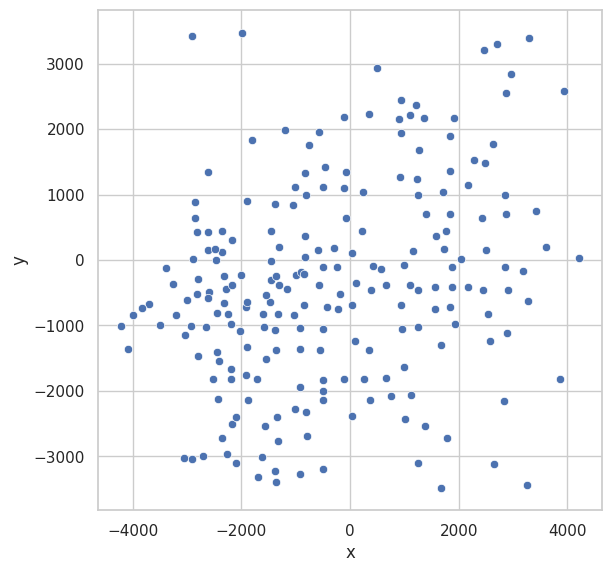

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

df = pd.read_csv('202004-stations-cartesian.csv')

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(data=df, x="x", y="y")

Obtain background boundaries

In [9]:
x1 = -5000
y1 = 5000
lon1 = x1 / r_ref * 180 / np.pi + lon_center
lat1 = y1 / r * 180 / np.pi + lat_center
print((lat1, lon1))

x2 = 5000
y2 = -5000
lon2 = x2 / r_ref * 180 / np.pi + lon_center
lat2 = y2 / r * 180 / np.pi + lat_center
print((lat2, lon2))

(38.941179024766846, -77.07420856583836)
(38.85134697523316, -76.95878535596292)


## Prepare ns3 data

Trim beforehand the dataset based on selected stations

In [8]:
# drop unused columns and rename
df = trips_dataset.drop(columns=['Duration', 'Start station',
                                 'End station', 'Member type']).dropna()
df.columns = ['started_at',	'ended_at',
              'start_station_id', 'end_station_id', 'bike_id']
og_len = len(df)  # save initial size
# load trimmed stations coordinates
stations = pd.read_csv('202004-stations-cartesian.csv').set_index('station_id')
# trim down trips that are not between station
df = df[(df['start_station_id'].isin(stations.index))
        & (df['end_station_id'].isin(stations.index))]
# join stations coordinates
df = df.join(stations.rename(
    columns={'x': 'start_x', 'y': 'start_y'}), 'start_station_id').dropna()
df = df.join(stations.rename(
    columns={'x': 'end_x', 'y': 'end_y'}), 'end_station_id').dropna()
# ditch unnecessary columns
df = df[['started_at', 'ended_at', 'start_x',
         'start_y', 'end_x', 'end_y', 'bike_id']]
# convert datetime columns to Unix time
t_zero = pd.Timestamp(df['started_at'].min()) - pd.Timedelta('5s')
df['started_at'] = (pd.to_datetime(df['started_at']) -
                    t_zero) // pd.Timedelta('1s')
df['ended_at'] = (pd.to_datetime(df['ended_at']) -
                  t_zero) // pd.Timedelta('1s')
df = df.sort_values(by='started_at')
# to file
df.to_csv('201904-ns3-biketrips.csv', index=False)
print(f"{len(df)/og_len*100:.2f}% of trips still remaining after trimming")
df


74.44% of trips still remaining after trimming


,started_at,ended_at,start_x,start_y,end_x,end_y,bike_id
0,5,318,1399.021992,702.199274,2873.855348,707.431260,W24063
1,279,732,-1333.357400,-2761.931864,-1574.816635,-1019.791939,W22080
2,393,727,-1369.138765,-1373.340591,357.983538,-1378.127301,W00276
4,460,2070,1683.106970,-1296.307950,422.875166,-94.064424,75558
5,467,824,-493.304954,-113.547924,-454.331421,1426.328361,W20136
...,...,...,...,...,...,...,...
347984,2591228,2592483,357.983538,-1378.127301,1157.649394,143.712629,W22640
347985,2591416,2593316,-814.657564,-2330.682658,-1894.076514,-1322.356560,W22951
347986,2591464,2591784,-912.124963,-1947.857150,-919.662441,-3269.768435,W22468
347987,2591465,2592682,1221.328095,2365.859413,3430.589129,741.717464,W23326


Test coodinates with plot

<AxesSubplot:xlabel='start_x', ylabel='start_y'>

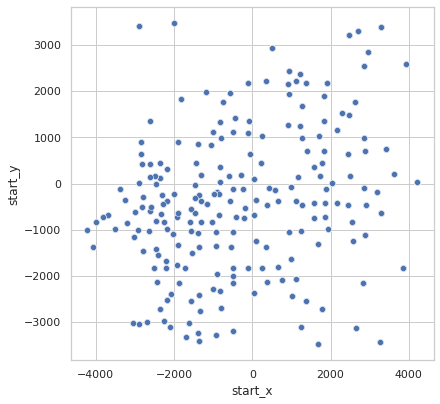

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

df = pd.read_csv('202003-ns3-biketrips.csv')

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(data=df, x="start_x", y="start_y")

In [12]:
# to file: one file per bike + index (this takes time)
for id, trips in df.groupby('bike_id', as_index=True):
    trips.to_csv(ns3datadir + f'{id}.csv', index=False)
df[['bike_id']].drop_duplicates().reset_index(
    drop=True).to_csv(ns3datadir + 'index.csv')
print('done.')


done.
